## Project 7 - Sentiment Analysis

### **Assignment**  
Pick one of the company data files and build your own classifier. 

When you're satisfied with its performance (at this point just using the accuracy measure shown in the example):  
test it on one of the other datasets to see how well these kinds of classifiers translate from one context to another.

Include your model and a brief writeup of your feature engineering and selection process to submit and review with your mentor.

In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
pd.options.display.max_colwidth = 100

In [14]:
def get_file_encoding(fn):
    import chardet
        
    with open(fn, 'rb') as f:
        content = f.read()

    charset = chardet.detect(content)
    # {'encoding': 'EUC-JP', 'confidence': 0.99}
    #print("character set = {}".format(charset['encoding']))
    
    return charset['encoding']

In [15]:
# Let's process the data)
def open_and_load_file (filename, columnnames):
    file_encoding = get_file_encoding(filename)
    df = pd.read_csv(filename, delimiter= '\t', header=None, encoding=file_encoding) 
    df.columns = columnnames
    return df, file_encoding

In [16]:
def run_Bernoulli_supervised_learning(d1, t1):
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
    from sklearn.naive_bayes import BernoulliNB

    # Instantiate our model and store it in a new variable.
    bnb = BernoulliNB()

    # Fit our model to the data.
    bnb.fit(d1, target)

    # Classify, storing the result in a new variable.
    y_pred = bnb.predict(d1)

    # Display our results.
    return_message = "Number of mislabeled points out of a total {} points : {}".format(
        d1.shape[0],
        (t1 != y_pred).sum()
    )

    return (return_message, d1.shape[0], (t1 != y_pred).sum())

In [17]:
keywords = ['blah', 'disgusted','fucking','dirt','avoid', 'mediocre,','elsewhere','wonderful','awesome','sucked',
            'shocked','disgraceful','awkward','not return','horrible','below average','bland','disgust','generous',
            'ample','huge','winner','definitely','reasonable', 'not good', 'awful','tender','quickly','awesome',
            'delicious','amazing','worth','phenomenal','helpful','good','fantastic','fresh','recommended', 
            'beautiful', 'outstanding', 'great','teamwork','enjoyed','inexpensive','fav','loved','approval',
            'delightful','flavorful','good','tasty','delight','beautiful','performed','amazing','cute','friendly',
            'BARGAIN', 'unreal','great','prompt','highly recommended','jewel', 'love', 'is worth', 'sticks around',
            'loved', 'hit']

In [18]:
def do_the_keywords():
    for key in keywords:
        # Add spaces around the key so that we are getting theword,
        # not just pattern matching
        sentiment_raw[str(key)] = sentiment_raw.message.str.contains(' ' + str(key) + ' ', case=False)

In [19]:
def do_the_heatmap(subplotno):
    plt.subplot(3,1,subplotno) 
    sns.heatmap(sentiment_raw.corr(), cmap="Blues")

In [20]:
def set_data_and_target():
    global data 
    data = sentiment_raw[keywords]
    # data.sample(5)
    
    global target 
    target = sentiment_raw['sentiment']
    # target.head(10)

In [21]:
file_list = ['amazon_cells_labelled.txt', 'imdb_labelled.txt', 'yelp_labelled.txt']
file_path = "../../../../Datafiles/sentiment_labelled_sentences/"

#### main

Now processing file amazon_cells_labelled.txt
y=1000, z=414
Now processing file imdb_labelled.txt
y=748, z=305
Now processing file yelp_labelled.txt
y=1000, z=353
That's all folks!!!


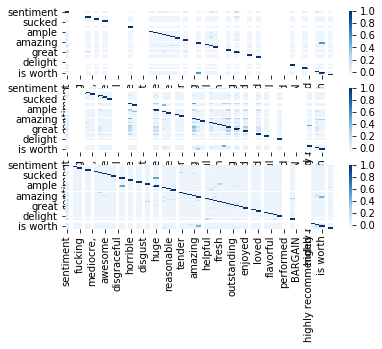

In [22]:
subplotnum = 1
for filenom in file_list:
    print("Now processing file {}".format(filenom))
    sentiment_raw, encod = open_and_load_file(file_path + filenom , ['message', 'sentiment'])
    do_the_keywords()
    do_the_heatmap(subplotnum)
    set_data_and_target()
    xmsg, y, z = run_Bernoulli_supervised_learning(data, target)
    print("y={}, z={}".format(y, z))
    sentiment_raw = pd.DataFrame()
    subplotnum += 1
print("That's all folks!!!")